In [46]:
# Load the datasets
train = pd.read_csv("../data/train_encoded.csv")
test = pd.read_csv("../data/test_encoded.csv")

print("Train Columns:", train.columns.tolist())
print("Test Columns:", test.columns.tolist())

Train Columns: ['URL', 'Label', 'url_length', 'num_dots', 'num_hyphens', 'has_at', 'has_https', 'has_ip', 'count_suspicious_words']
Test Columns: ['URL', 'Label', 'url_length', 'num_dots', 'num_hyphens', 'has_at', 'has_https', 'has_ip', 'count_suspicious_words']


In [47]:
train.head()

,URL,Label,url_length,num_dots,num_hyphens,has_at,has_https,has_ip,count_suspicious_words
0,452940,0,29,2,0,0,0,0,0
1,455349,0,29,3,0,0,0,0,0
2,210650,0,27,1,0,0,0,0,0
3,355689,0,34,1,1,0,0,0,0
4,422046,1,23,2,0,0,0,0,0


In [52]:
test.head()

,URL,Label,url_length,num_dots,num_hyphens,has_at,has_https,has_ip,count_suspicious_words
0,403345,1,31,3,0,0,0,0,0
1,351073,1,24,2,0,0,0,0,1
2,316423,1,142,14,0,0,0,0,1
3,321189,1,76,2,1,0,0,0,0
4,483175,0,25,2,0,0,0,0,0


In [60]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your CSV files
train = pd.read_csv("../data/train_encoded.csv")
test = pd.read_csv("../data/test_encoded.csv")

# Assuming the target column is named 'target', adjust accordingly
X_train = train.drop(columns=['Label'])
y_train = train['Label']

X_test = test.drop(columns=['Label'])
y_test = test['Label']

# Define the base estimator and AdaBoost classifier
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator, n_estimators=50, learning_rate=1.0)

# Train the model
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred = ada_boost.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.84



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     78736
           1       0.83      0.36      0.50     22704

    accuracy                           0.84    101440
   macro avg       0.84      0.67      0.70    101440
weighted avg       0.84      0.84      0.81    101440



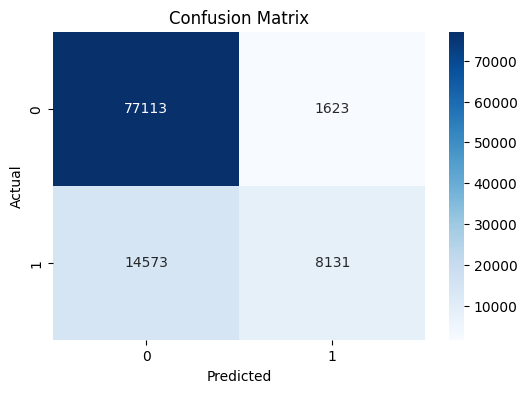

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = ada_boost.predict(X_test)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [62]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.84


##  Save the Ada Boost model

In [63]:
import joblib

joblib.dump(model, "../model/adaboost_model_new.pkl")

['../model/adaboost_model_new.pkl']

In [64]:
X_train.head()

,URL,url_length,num_dots,num_hyphens,has_at,has_https,has_ip,count_suspicious_words
0,452940,29,2,0,0,0,0,0
1,455349,29,3,0,0,0,0,0
2,210650,27,1,0,0,0,0,0
3,355689,34,1,1,0,0,0,0
4,422046,23,2,0,0,0,0,0


In [58]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64